# Serum proteomic pattern diagnostics

Dataset from the FDA-NCI Clinical Proteomics Program Databank [1,2].

Each column of `A` represents measurements taken from a patient. There are 216 columns representing 216 patients, out of which 121 are ovarian cancer patients and 95 are normal patients.

Each row represents the ion intensity level at a specific mass-charge value indicated in MZ. There are 2000 mass-charge values, and each row represents the ion-intensity levels of the patients at that particular mass-charge value.

The variable `grp` holds the index information as to which of these samples represent cancer patients and which ones represent normal patients.

- [1] T.P. Conrads, et al., ["High-resolution serum proteomic features for ovarian detection"](https://doi.org/10.1677/erc.0.0110163), Endocrine-Related Cancer, 11, 2004, pp. 163-178.
- [2] E.F. Petricoin, et al., ["Use of proteomic patterns in serum to identify ovarian cancer"](https://doi.org/10.1016/s0140-6736(02)07746-2), Lancet, 359(9306), 2002, pp. 572-577.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d import Axes3D

ovariancancer_obs_path = '/Users/akselostmoe/Skole/4. klasse høst 2021/maskinlæring/labs/lab1/data/ovariancancer_obs.csv'
ovariancancer_grp_path = '/Users/akselostmoe/Skole/4. klasse høst 2021/maskinlæring/labs/lab1/data/ovariancancer_grp.csv'

A = np.genfromtxt(ovariancancer_obs_path, delimiter=',').transpose()
f = open(ovariancancer_grp_path)
grp = np.array(f.read().split("\n"))
grp = grp[grp != '']

How many patients? How many features?

In [2]:

# features
print(A.shape[0])
# patients
print(A.shape[1])
print(A.shape)
print(A)

4000
216
(4000, 216)
[[ 0.063915   0.025409   0.025536  ...  0.023558   0.028351   0.027428 ]
 [ 0.033242   0.051085   0.036123  ...  0.021331   0.023266   0.027021 ]
 [ 0.018484   0.056305   0.054195  ...  0.01621    0.0045561  0.015273 ]
 ...
 [ 0.038839   0.020427  -0.0094466 ...  0.0082736  0.010033   0.026642 ]
 [ 0.038151   0.023261   0.021481  ...  0.004742   0.017391   0.027718 ]
 [ 0.032085   0.019975   0.025569  ...  0.024756   0.031537   0.040418 ]]


How many patiens with and without cancer are there in the dataset?

In [3]:
canc_count = 0 
well_count = 0

for el in grp: 
    if el == "Cancer":
        canc_count += 1
    else: 
        well_count += 1

print(canc_count, well_count)


121 95


Choose two proteins (between 1 and 2000), and make a scatterplot of the corresponding values plotting with different colors the data corresponding to patients with and without cancer. Can you easily distinguish between patients with/without cancer?

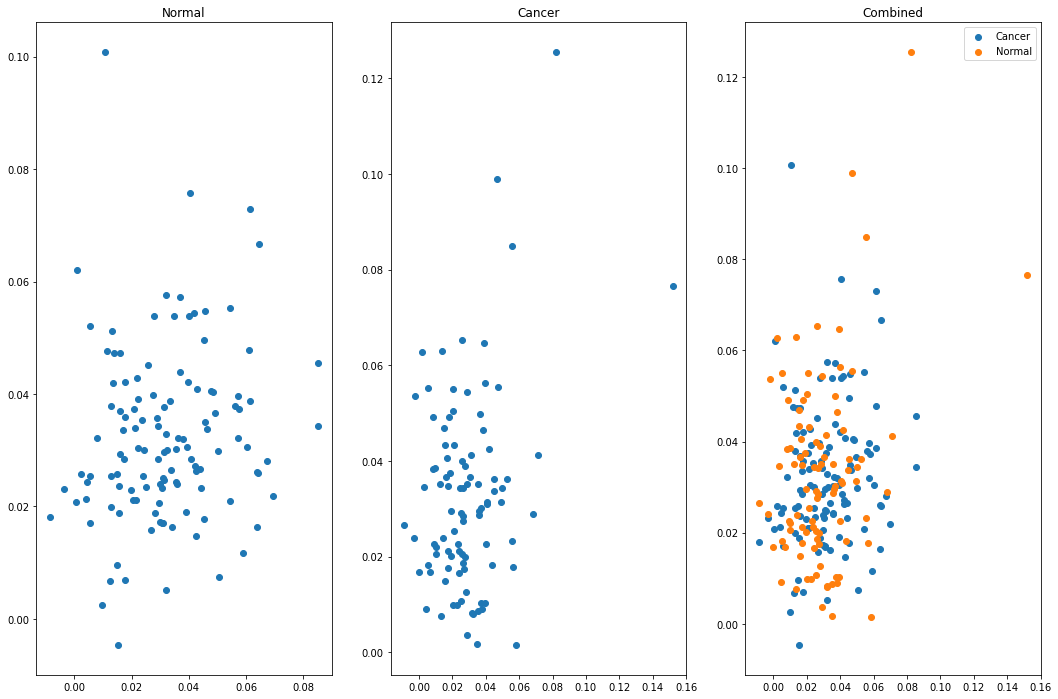

In [4]:
protein_1 = 500
protein_2 = 1999

fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(18,12))

axes[0].scatter(A[protein_1, grp == "Cancer"], A[protein_2, grp == "Cancer"], label = "Cancer")
axes[0].set_title("Normal")

axes[1].scatter(A[protein_1, grp == "Normal"], A[protein_2, grp == "Normal"], label = "Normal")
axes[1].set_title("Cancer")

axes[2].scatter(A[protein_1, grp == "Cancer"], A[protein_2, grp == "Cancer"], label = "Cancer")
axes[2].scatter(A[protein_1, grp == "Normal"], A[protein_2, grp == "Normal"], label = "Normal")
axes[2].set_title("Combined")

plt.legend()




Repeat the previous point, this time by considering three proteins.

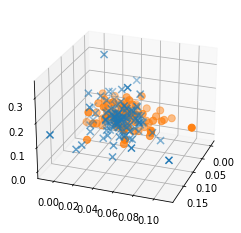

In [5]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

protein_1 = 1000
protein_2 = 2000
protein_3 = 3000

ax.scatter(A[protein_1, grp == "Cancer"], A[protein_2, grp == "Cancer"], A[protein_3, grp == "Cancer"], label="Cancer", marker='x', s=50)
ax.scatter(A[protein_1, grp == "Normal"], A[protein_2, grp == "Normal"], A[protein_3, grp == "Normal"], label="Normal", marker='o', s=50)

ax.view_init(25,20)

## Principal Components Analysis

Perform PCA on the data. Then, plot the trend of
- the singular values $\sigma_k$
- the cumulate fraction of singular values: $\frac{\sum_{i=1}^{k} \sigma_i}{\sum_{i=1}^{q} \sigma_i}$
- the fraction of the "explained variance": $\frac{\sum_{i=1}^{k} \sigma_i^2}{\sum_{i=1}^{q} \sigma_i^2}$

(4000, 216)
(216, 216)


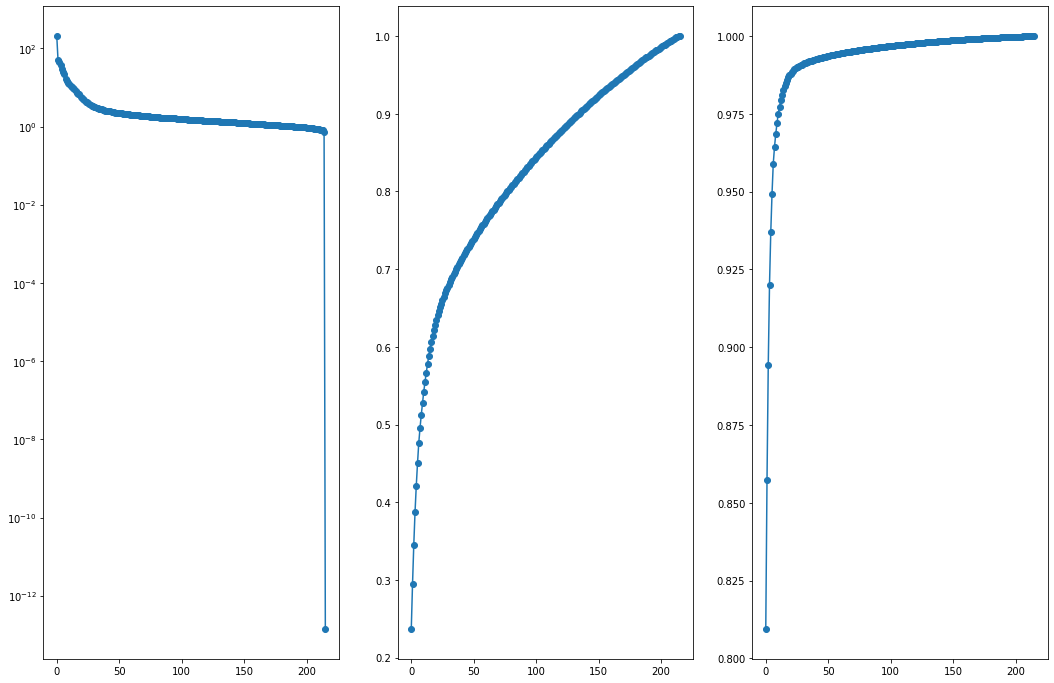

In [6]:
A_mean = np.mean(A, axis=1)

U, S, VT = np.linalg.svd(A-A_mean[:,None], full_matrices=False)
print(U.shape)
print(VT.shape)

fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(18,12))
# logarythmic plotting of singular values
axes[0].semilogy(S, "o-")
# cumulative fraction
axes[1].plot(np.cumsum(S)/np.sum(S), "o-")
# fraction of explained variance
axes[2].plot(np.cumsum(S**2)/np.sum(S**2), "o-")


Make a scatterplot of the first two principal components of the patients.

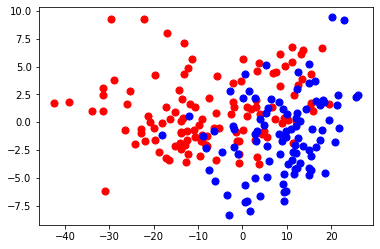

In [7]:
"""plt.scatter(U[:,0], U[:,1])
plt.show()"""



"""for i in range(A.shape[1]):
    if grp[i] == 'Cancer':
        col = 'r'
    else:
        col = 'b'
    plt.scatter(U[:,0], U[:,1], color = col, s=50)
"""
for i in range(A.shape[1]):
  x = np.inner(A[:, i] - A_mean, U[:, 0]) 
  y = np.inner(A[:, i] - A_mean, U[:, 1]) 
  if grp[i] == 'Cancer':
    col = 'r'
  else:
    col = 'b'
  plt.scatter(x, y, marker='o', color=col, s=50)

plt.show()


Make a scatterplot of the first three principal components of the patients.

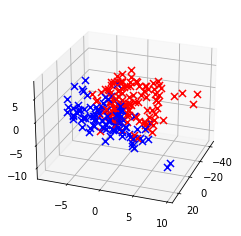

In [8]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

for i in range(A.shape[1]):  
  x = np.inner(A[:, i] - A_mean, U[:, 0]) 
  y = np.inner(A[:, i] - A_mean, U[:, 1]) 
  z = np.inner(A[:, i] - A_mean, U[:, 2])

  if grp[i] == 'Cancer':
    col = 'r'
  else:
    col = 'b'
  ax.scatter(x, y, z, marker='x', color=col, s=50)

ax.view_init(25,20)
plt.show()

